# Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

# Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv


# 1. Data Preprocessing:

In [205]:
# Imp libs:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Spliting data
from sklearn.model_selection import train_test_split,GridSearchCV

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [206]:
# Standardizing and Normalizing data:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import xgboost as xgb

# Spliting data
from sklearn.model_selection import train_test_split,GridSearchCV

# Importing metrics
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [207]:
# Load the dataset
url = 'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv'
df = pd.read_csv(url)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [208]:
df.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [209]:
df.tail(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7742,18.0,30-08-2017,23.3,18.2,30.259682,86.565193,26.474403,17.289157,6.522731,94.203783,...,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.231300,4435.611816,27.8,16.7
7743,19.0,30-08-2017,22.6,15.0,25.536045,78.779045,26.596280,17.856040,6.905963,54.030075,...,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.767800,4495.473633,27.1,16.6
7744,20.0,30-08-2017,22.7,15.9,38.216373,94.428116,24.037222,15.772677,6.478060,112.580310,...,0.000000,0.000000,0.000000,37.6181,127.004,146.5540,4.729600,4554.965332,26.7,16.3
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.000000,0.000000,0.000000,37.5507,127.040,26.2980,0.572100,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [210]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [211]:
df.shape

(7752, 25)

In [212]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [213]:
# Check for missing values
print(df.isnull().sum())

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


In [214]:
null_cols= ['estimated_generation_gwh','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','other_fuel2',
            'other_fuel1']

In [215]:
df.shape[0]

7752

In [216]:
df.drop

<bound method DataFrame.drop of       station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.

In [217]:
df.shape

(7752, 25)

In [218]:
# Convert 'Date' column to datetime type with dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [219]:
# Drop rows with missing values
df.dropna(inplace=True)

In [220]:
# Separate input features (X) and target variables (y_max and y_min)
X = df.drop(columns=['Next_Tmax', 'Next_Tmin'])
y_max = df['Next_Tmax']
y_min = df['Next_Tmin']

# Step 2: Exploratory Data Analysis (EDA) and Visualization

In [221]:
# Statistical analysis
print(df.describe())

           station                           Date  Present_Tmax  Present_Tmin  \
count  7588.000000                           7588   7588.000000   7588.000000   
mean     13.014101  2015-07-27 18:22:12.208750592     29.748366     23.195809   
min       1.000000            2013-06-30 00:00:00     20.000000     11.300000   
25%       7.000000            2014-07-15 00:00:00     27.800000     21.600000   
50%      13.000000            2015-07-29 00:00:00     29.900000     23.400000   
75%      19.000000            2016-08-14 00:00:00     32.000000     24.800000   
max      25.000000            2017-08-30 00:00:00     37.600000     29.900000   
std       7.217858                            NaN      2.967401      2.400880   

       LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
count  7588.000000  7588.000000       7588.000000       7588.000000   
mean     56.724969    88.360823         29.620128         23.511786   
min      19.794666    58.936283         17.624954        

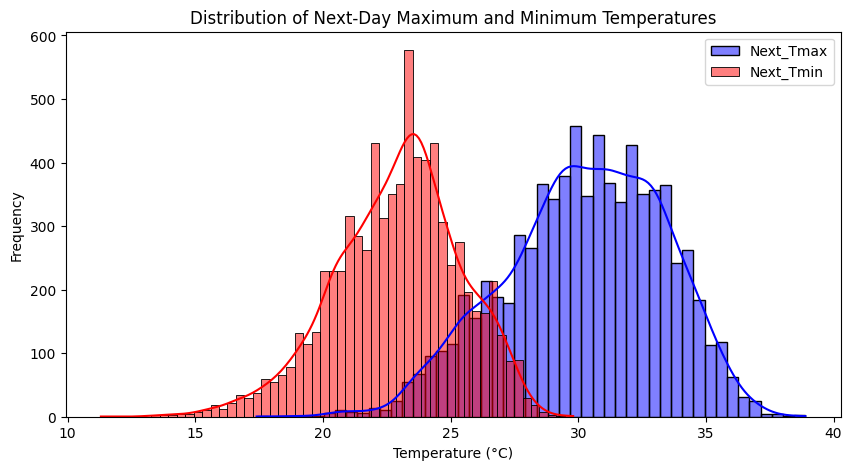

In [222]:
# Visualize the distributions of the target variables
plt.figure(figsize=(10, 5))
sns.histplot(df['Next_Tmax'], kde=True, color='blue', label='Next_Tmax')
sns.histplot(df['Next_Tmin'], kde=True, color='red', label='Next_Tmin')
plt.legend()
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Next-Day Maximum and Minimum Temperatures')
plt.show()

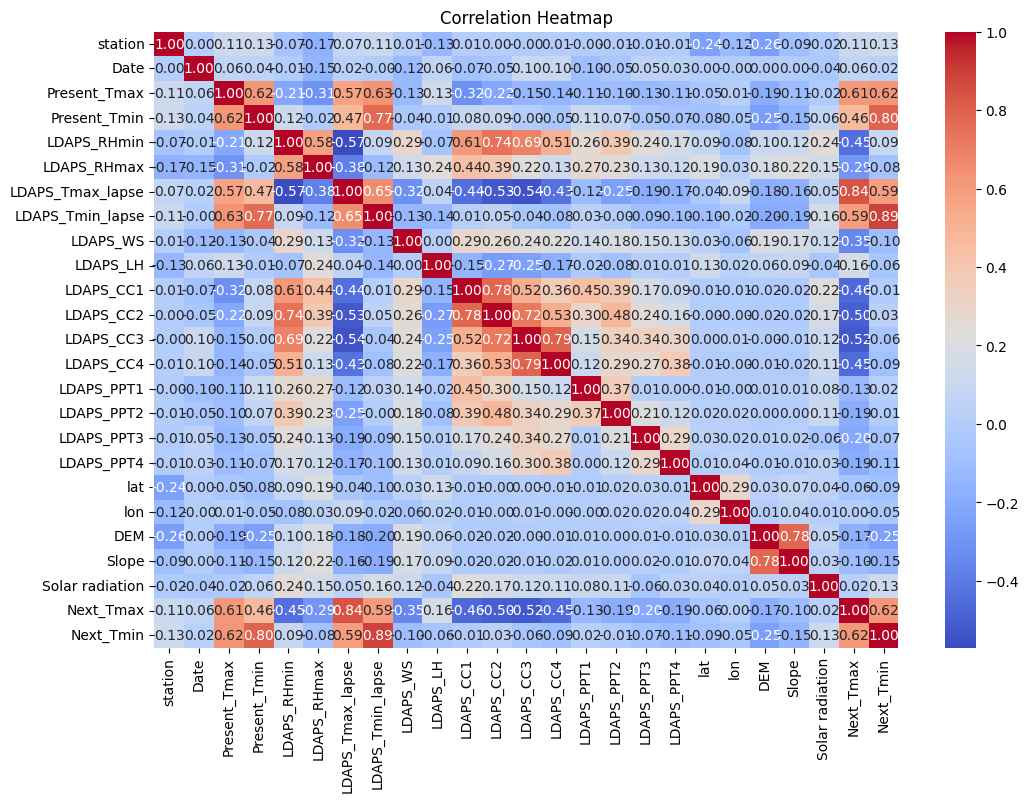

In [227]:
# Study relationships between features and target variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Step 3: Feature Selection (Optional: based on correlation and domain knowledge)

# Step 4: Data Splitting

In [224]:
# Convert all columns in X to numeric data type
X = X.apply(pd.to_numeric)

In [225]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_max_train, y_max_test, y_min_train, y_min_test = train_test_split(
    X, y_max, y_min, test_size=0.2, random_state=42
)

# Step 5: Model Selection and Training

In [226]:
# Initialize models
model_max = RandomForestRegressor(random_state=42)
model_min = GradientBoostingRegressor(random_state=42)

# Train models
model_max.fit(X_train, y_max_train)
model_min.fit(X_train, y_min_train)

GradientBoostingRegressor(random_state=42)

# Step 6: Model Evaluation

In [168]:
# Predictions on the test set
y_max_pred = model_max.predict(X_test)
y_min_pred = model_min.predict(X_test)

# Evaluate models
mae_max = mean_absolute_error(y_max_test, y_max_pred)
mae_min = mean_absolute_error(y_min_test, y_min_pred)

mse_max = mean_squared_error(y_max_test, y_max_pred)
mse_min = mean_squared_error(y_min_test, y_min_pred)

rmse_max = mean_squared_error(y_max_test, y_max_pred, squared=False)
rmse_min = mean_squared_error(y_min_test, y_min_pred, squared=False)

print("Max Temperature Prediction - MAE:", mae_max, "MSE:", mse_max, "RMSE:", rmse_max)
print("Min Temperature Prediction - MAE:", mae_min, "MSE:", mse_min, "RMSE:", rmse_min)

Max Temperature Prediction - MAE: 0.7029156785243738 MSE: 0.8759583109354403 RMSE: 0.9359264452591562
Min Temperature Prediction - MAE: 0.6489784689670746 MSE: 0.6855634900033077 RMSE: 0.8279876146436659


# Step 7: Hyperparameter Tuning (Optional: for models with tunable hyperparameters)

# Step 8: Final Model Testing (Already done in Step 6)

# Step 9: Visualization of Results (Already done in Step 2)

# Step 10: Conclusion (Based on the model evaluation results)

In [177]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [178]:
df.dropna

<bound method DataFrame.dropna of       station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0 2013-06-30          28.7          21.4    58.255688   
1         2.0 2013-06-30          31.9          21.6    52.263397   
2         3.0 2013-06-30          31.6          23.3    48.690479   
3         4.0 2013-06-30          32.0          23.4    58.239788   
4         5.0 2013-06-30          31.4          21.9    56.174095   
...       ...        ...           ...           ...          ...   
7745     21.0 2017-08-30          23.1          17.8    24.688997   
7746     22.0 2017-08-30          22.5          17.4    30.094858   
7747     23.0 2017-08-30          23.3          17.1    26.741310   
7748     24.0 2017-08-30          23.3          17.7    24.040634   
7749     25.0 2017-08-30          23.2          17.4    22.933014   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936  6.8

In [179]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [184]:
cont_data = df.select_dtypes(include=['int64','float64'])

cat_data= df.select_dtypes(include=['object'])

cont_columns = cont_data.columns

cat_columns = cat_data.columns

In [185]:
cont_columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [186]:
cat_columns

Index([], dtype='object')

In [187]:
!pip install scipy

In [189]:
for i in cat_columns:
    print('For column --',i,'-- value counts are: \n',df[i].value_counts(),'\n\n')

In [190]:
cat_columns

Index([], dtype='object')

In [191]:
cont_columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [193]:
group_fuel = df.groupby(['LDAPS_CC2','Next_Tmin'])
group_fuel.first()

station       Date  Present_Tmax  Present_Tmin  \
LDAPS_CC2 Next_Tmin                                                   
0.000000  11.3          17.0 2016-08-26          26.5          19.7   
          13.3           2.0 2016-08-26          27.2          19.1   
          14.1          10.0 2016-08-26          26.5          19.1   
          14.3          17.0 2017-08-25          29.9          20.5   
          14.7          17.0 2015-07-02          28.7          19.8   
...                      ...        ...           ...           ...   
0.964021  20.0          19.0 2016-07-04          23.7          20.5   
0.965889  21.9          19.0 2013-07-12          23.8          22.9   
0.966637  23.1          20.0 2013-07-11          24.8          23.8   
0.966997  15.6          10.0 2016-08-30          22.7          15.9   
0.968353  24.1          20.0 2017-07-07          27.8          23.8   

                     LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
LDAPS_CC2 Next_Tmin                                               
0.000000  11.3         36.836067    82.470726         27.907996   
          13.3         32.728909    72.317261         28.657923   
          14.1         36.222317    79.418434         27.444146   
          14.3         33.356552    87.394768         28.482537   
          14.7         33.550488    86.788620         28.009794   
...                          ...          ...               ...   
0.964021  20.0         86.146652    95.995438         25.884300   
0.965889  21.9         94.181152    96.253777         24.948839   
0.966637  23.1         94.970688    99.318497         24.037609   
0.966997  15.6         74.735222    92.300171         19.770221   
0.968353  24.1         96.169815    99.946465         26.107864   

                     LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT1  \
LDAPS_CC2 Next_Tmin                                           ...               
0.000000  11.3              16.045908   6.551405  136.290163  ...    0.000000   
          13.3              17.326318   8.118150   80.069594  ...    0.000000   
          14.1              15.811816  10.060309   86.147411  ...    0.000000   
          14.3              18.294110   5.673341  135.295441  ...    0.000000   
          14.7              17.450534   7.358130  117.131347  ...    0.000000   
...                               ...        ...         ...  ...         ...   
0.964021  20.0              20.585096  11.456009   23.138728  ...    1.916126   
0.965889  21.9              22.886904   5.648236   25.220822  ...    5.387435   
0.966637  23.1              21.934696  14.119892   17.625762  ...    0.760121   
0.966997  15.6              15.483157  15.308176   73.949717  ...    0.869611   
0.968353  24.1              24.018824  11.857190    8.187836  ...    0.098520   

                     LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
LDAPS_CC2 Next_Tmin                                                         
0.000000  11.3         0.000000    0.000000    0.000000  37.6181  127.099   
          13.3         0.000000    0.000000    0.000000  37.6046  127.032   
          14.1         0.000000    0.000000    0.000000  37.4562  126.955   
          14.3         0.000000    0.000000    0.000000  37.6181  127.099   
          14.7         0.000000    0.000000    0.000000  37.6181  127.099   
...                         ...         ...         ...      ...      ...   
0.964021  20.0         2.344346    1.154177    3.232000  37.5776  126.938   
0.965889  21.9         4.792033    1.068083    0.692214  37.5776  126.938   
0.966637  23.1         4.329367    3.525476    0.443838  37.6181  127.004   
0.966997  15.6         2.670665    5.128197    0.972291  37.4562  126.955   
0.968353  24.1         2.882376    0.045696    0.016854  37.6181  127.004   

                          DEM   Slope  Solar radiation  Next_Tmax  
LDAPS_CC2 Next_Tmin                                                
0.000000  11.3        53.4712  0.

In [203]:
grp1 = df.groupby(['LDAPS_CC2','Next_Tmax'])
grp1.first()

station       Date  Present_Tmax  Present_Tmin  \
LDAPS_CC2 Next_Tmax                                                   
0.000000  25.4           1.0 2016-08-26          24.1          17.5   
          25.5           1.0 2015-07-02          25.4          17.6   
          25.8          10.0 2015-07-02          26.2          19.5   
          26.6           7.0 2015-07-02          27.5          20.6   
          26.8          16.0 2015-07-02          26.7          18.8   
...                      ...        ...           ...           ...   
0.964021  24.9          19.0 2016-07-04          23.7          20.5   
0.965889  25.3          19.0 2013-07-12          23.8          22.9   
0.966637  23.9          20.0 2013-07-11          24.8          23.8   
0.966997  20.3          10.0 2016-08-30          22.7          15.9   
0.968353  27.5          20.0 2017-07-07          27.8          23.8   

                     LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
LDAPS_CC2 Next_Tmax                                               
0.000000  25.4         38.717972    76.003540         26.500978   
          25.5         37.184532    95.760811         25.790685   
          25.8         32.224564    95.575317         26.147441   
          26.6         43.072060    91.690460         26.118743   
          26.8         32.452168    93.104439         27.150849   
...                          ...          ...               ...   
0.964021  24.9         86.146652    95.995438         25.884300   
0.965889  25.3         94.181152    96.253777         24.948839   
0.966637  23.9         94.970688    99.318497         24.037609   
0.966997  20.3         74.735222    92.300171         19.770221   
0.968353  27.5         96.169815    99.946465         26.107864   

                     LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT1  \
LDAPS_CC2 Next_Tmax                                           ...               
0.000000  25.4              15.828340  11.806084  141.535966  ...    0.000000   
          25.5              18.077395   9.720974   80.005692  ...    0.000000   
          25.8              18.470359   8.468258   89.306647  ...    9.480151   
          26.6              18.637724   7.562683  144.693982  ...    0.000000   
          26.8              19.446652   8.073616  122.521991  ...    9.311459   
...                               ...        ...         ...  ...         ...   
0.964021  24.9              20.585096  11.456009   23.138728  ...    1.916126   
0.965889  25.3              22.886904   5.648236   25.220822  ...    5.387435   
0.966637  23.9              21.934696  14.119892   17.625762  ...    0.760121   
0.966997  20.3              15.483157  15.308176   73.949717  ...    0.869611   
0.968353  27.5              24.018824  11.857190    8.187836  ...    0.098520   

                     LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
LDAPS_CC2 Next_Tmax                                                         
0.000000  25.4         0.000000    0.000000    0.000000  37.6046  126.991   
          25.5         0.000000    0.000000    0.000000  37.6046  126.991   
          25.8         0.000000    0.000000    0.000000  37.4562  126.955   
          26.6         0.000000    0.000000    0.000000  37.5776  126.838   
          26.8         0.000000    0.000000    0.000000  37.4697  126.995   
...                         ...         ...         ...      ...      ...   
0.964021  24.9         2.344346    1.154177    3.232000  37.5776  126.938   
0.965889  25.3         4.792033    1.068083    0.692214  37.5776  126.938   
0.966637  23.9         4.329367    3.525476    0.443838  37.6181  127.004   
0.966997  20.3         2.670665    5.128197    0.972291  37.4562  126.955   
0.968353  27.5         2.882376    0.045696    0.016854  37.6181  127.004   

                          DEM   Slope  Solar radiation  Next_Tmin  
LDAPS_CC2 Next_Tmax                                                
0.000000  25.4       212.3350  2.